In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import sklearn as sk
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Deception 1 : Homicide
#### Argument: America has six times as many firearm homicides as Canada, and nearly 16 times as many as Germany

Dataset - https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list 

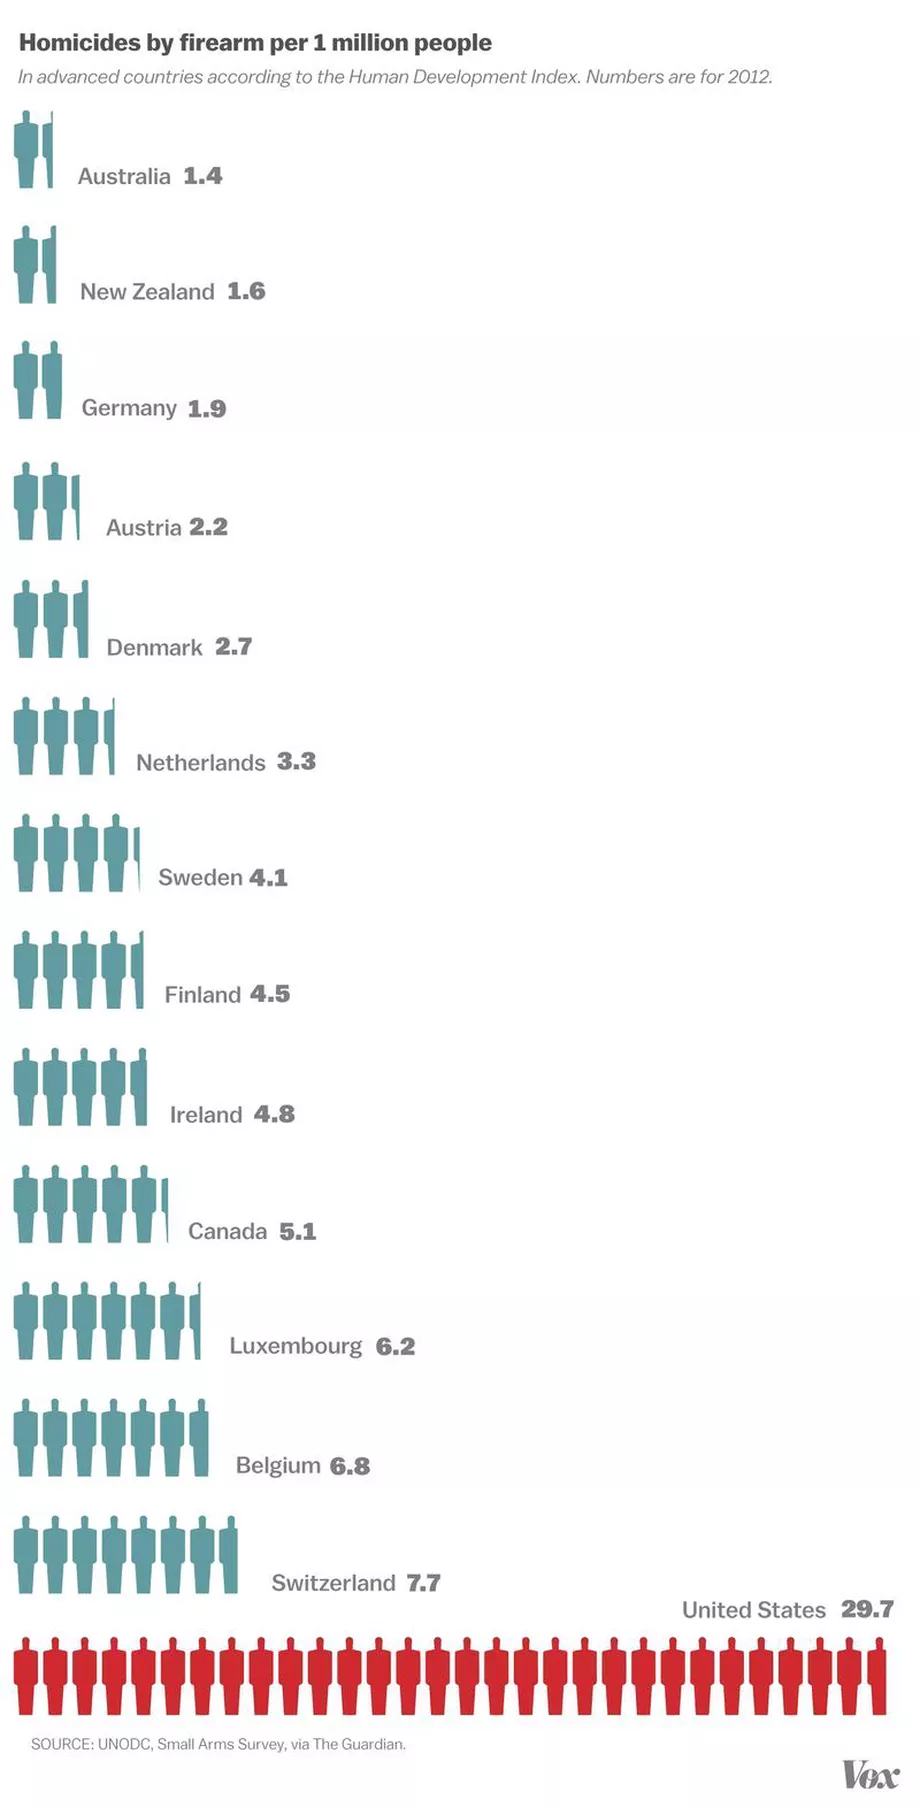

In [91]:
Image("gun_homicides_per_capita.jpg", width = 200, height = 50)

Loading data from excel into data frame

In [92]:
df = pd.read_excel("World firearms murders and ownership_SurveyData_2nd.xlsx")

In [93]:
df.head(2)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0


In [94]:
df.dropna().head(2)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0


Dropping unwanted variables from the data for better visualization

In [95]:
df.drop(labels = ['ISO code','Source','% of homicides by firearm','Number of homicides by firearm','Rank by rate of ownership','Average total all civilian firearms'], inplace=True,axis=1)

Data wrangling for finding Firearm rate per 1 million people. Multiplying the variable by 10

In [96]:
df['Homicide'] = df['Homicide by firearm rate per 100,000 pop']*10

In [97]:
df.head(2)

,Country/Territory,"Homicide by firearm rate per 100,000 pop",Average firearms per 100 people,Homicide
0,Albania,1.76,8.6,17.6
1,Algeria,0.06,7.6,0.6


Data sorting to find out the the country with the highest homicide

In [98]:
dfsort = df.sort_values(by = 'Homicide', ascending = False)

In [99]:
dfsort.dropna().head(5)

,Country/Territory,"Homicide by firearm rate per 100,000 pop",Average firearms per 100 people,Homicide
72,Honduras,68.43,6.2,684.3
51,El Salvador,39.90,5.8,399.0
83,Jamaica,39.40,8.1,394.0
179,Venezuela,38.97,10.7,389.7
67,Guatemala,34.81,13.1,348.1


#### Data Insight: For the original data product many countries data was discarded. Like the above sorted values give you the countries with the highest homicide by Firearm rate per 1 million people. As you can see US doesn't even come in the top 5. However for the sake of our argument we are discarding the above countries and comparing only developed countries such as US, Germany, Canada,Australia,etc. Hence this was a key insight which I discovered during the making of the deceptive verison of the product.

In [100]:
dfsort.loc[~(dfsort==0).all(axis=1)].head(2)

,Country/Territory,"Homicide by firearm rate per 100,000 pop",Average firearms per 100 people,Homicide
72,Honduras,68.43,6.2,684.3
51,El Salvador,39.90,5.8,399.0


Extracting data for only developed countries

In [101]:
homicide = dfsort[(dfsort['Country/Territory'] == 'Austria') | (dfsort['Country/Territory'] == 'Denmark') | (dfsort['Country/Territory'] == 'Netherlands') |
      (dfsort['Country/Territory'] == 'Sweden') |(dfsort['Country/Territory'] == 'Finalnd') |(dfsort['Country/Territory'] == 'Ireland') |
     (dfsort['Country/Territory'] == 'Canada')|(dfsort['Country/Territory'] == 'Australia')| (dfsort['Country/Territory'] == 'New Zealand')|
        (dfsort['Country/Territory'] == 'Germany')|(dfsort['Country/Territory'] == 'Luxembourg')| (dfsort['Country/Territory'] == 'Belgium')|
     (dfsort['Country/Territory'] == 'Swizerland')|(dfsort['Country/Territory'] == 'United States') ]

In [102]:
homicide.head()

,Country/Territory,"Homicide by firearm rate per 100,000 pop",Average firearms per 100 people,Homicide
176,United States,2.97,88.8,29.7
14,Belgium,0.68,17.2,6.8
101,Luxembourg,0.62,15.3,6.2
29,Canada,0.51,30.8,5.1
80,Ireland,0.48,8.6,4.8


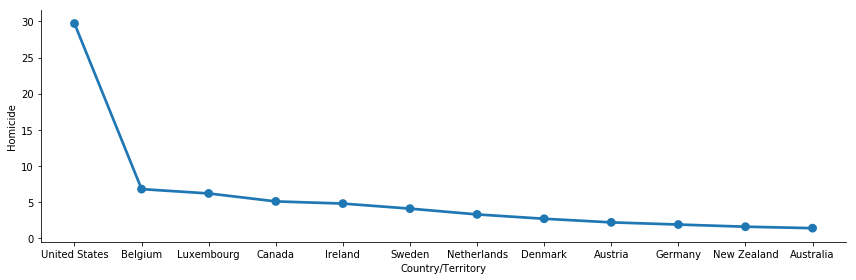

In [103]:
sns.factorplot(x = 'Country/Territory', y= 'Homicide' , data = homicide, aspect = 3)

The above version gives an idea of what the homicide data looks like for developed countries. This gives an idea of comparison between different countries.

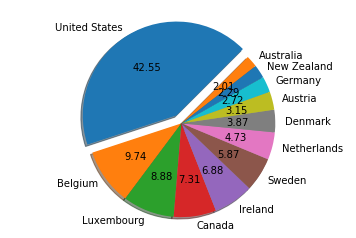

In [104]:
labels = ['United States','Belgium','Luxembourg','Canada','Ireland','Sweden','Netherlands','Denmark','Austria','Germany',
          'New Zealand','Australia']
sizes = [29.7,6.8,6.2,5.1,4.8,4.1,3.3,2.7,2.2,1.9,1.6,1.4]
explode = (0.1, 0, 0, 0,0,0,0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode,labels=labels, autopct='%1.2f',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Data Visualization Insights 1: The above data visualization is a deceptive version of the original data product because of two reasons. First, as the format of visual representation is a pie-chart it gives an impression that this is a total number of countries with Homicide however this isn't the case. The second reason is that the homicide per firearm per 1million people is very hard to infer because of the nature of the visualization.

#### Future Enhancement: I would want to converge the above two graphs i.e. the line-chart and pie-chart in such a way that it gives a view of percentage of homicide per firearm per 1million people per country but in a more comprehensive way. I would also love to use the location information in the data visualization.

### Deceptive 2 : Mass Shooting

#### On average, there is around one mass shooting for each day in America
Dataset Reference - http://www.gunviolencearchive.org/reports/mass-shootings/2015 

Original Data Visualization

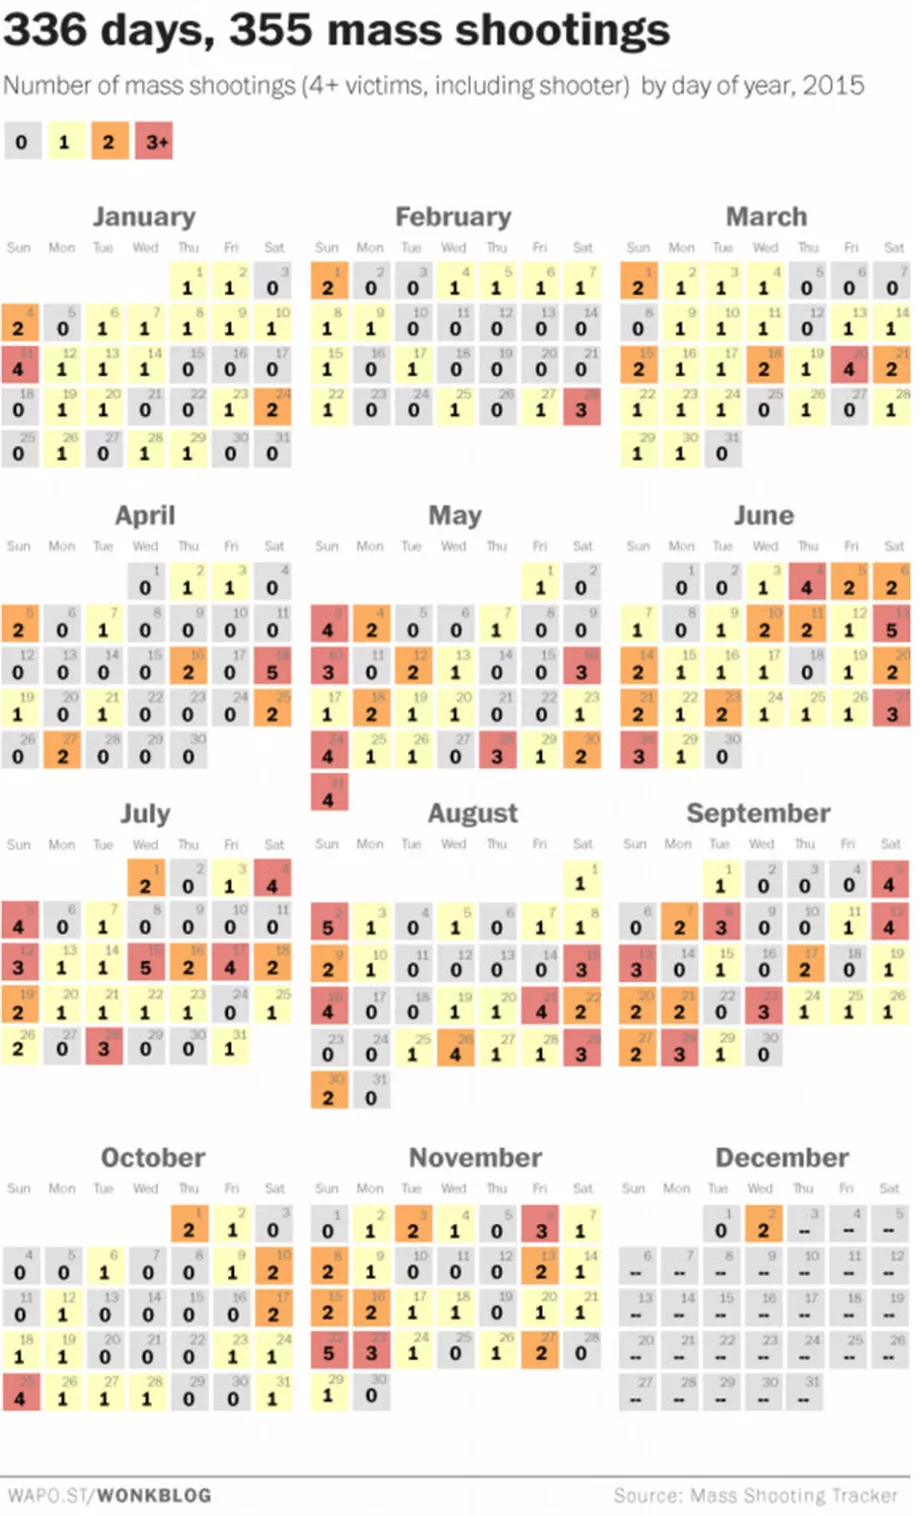

In [105]:
Image("mass_shooting_calendar.png", width = 200, height = 100)

Loading the Dataset

In [106]:
mass = pd.read_csv("2015_Mass Shooting Tracker_1st.csv")

In [107]:
mass.head(2)

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN


Data Cleaning - Dropping the Nan

In [108]:
mass.drop(labels=['Operations'],inplace=True,axis=1)

In [109]:
mass.head(2)

,Incident Date,State,City Or County,Address,# Killed,# Injured
0,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6
1,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4


Wanted to know how many were total Mass Shooting to get an idea of data

In [110]:
mass['Mass_shooting'] = mass['# Killed'] + mass['# Injured']

Sort by Incident Date

In [111]:
mass1 = mass.sort_values(by=['Incident Date'])

In [112]:
mass1.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Mass_shooting
265,"April 16, 2015",Arizona,Phoenix,4300 block of East Anderson Drive,5,0,5
262,"April 18, 2015",North Carolina,Lumberton,Martin Luther King Drive,1,3,4
264,"April 18, 2015",New Jersey,Paterson,Rosa Parks Blvd and Godwin Ave,1,3,4
263,"April 18, 2015",North Carolina,Charlotte,Bost Street,0,4,4
260,"April 18, 2015",Alabama,Montgomery,1800 block of Gibbs Court,0,5,5


Converting the Date to Datetime to extract the month column from the Date since the data given is only for year 2015.

In [113]:
mass1['Incident Date'] = pd.to_datetime(mass1['Incident Date'])

In [114]:
mass1['Month']=mass1['Incident Date'].apply(lambda x:int(x.month))

In [115]:
mass1.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Mass_shooting,Month
265,2015-04-16,Arizona,Phoenix,4300 block of East Anderson Drive,5,0,5,4
262,2015-04-18,North Carolina,Lumberton,Martin Luther King Drive,1,3,4,4
264,2015-04-18,New Jersey,Paterson,Rosa Parks Blvd and Godwin Ave,1,3,4,4
263,2015-04-18,North Carolina,Charlotte,Bost Street,0,4,4,4
260,2015-04-18,Alabama,Montgomery,1800 block of Gibbs Court,0,5,5,4


Groupby and aggregating the entire dataset to find out the monthly mass shooting, monthly killings and monthly injured data

In [116]:
massgrp = mass1.groupby('Month').agg({'Mass_shooting':'sum','# Killed':'sum','# Injured':'sum'})

In [117]:
massgrp.reset_index(['Month'], inplace=True)

In [118]:
massgrp.head()

,Month,# Injured,Mass_shooting,# Killed
0,1,71,107,36
1,2,54,87,33
2,3,86,106,20
3,4,71,88,17
4,5,147,188,41


To display the data wrangling the data to form two separate datasets which will be appended later to have categorical data

In [119]:
injured = massgrp[['Month','# Injured']]

In [120]:
injured.rename(columns = {'# Injured':'Victims'}, inplace = True)

In [121]:
injured['Category'] = 'injured'

In [122]:
injured.head()

,Month,Victims,Category
0,1,71,injured
1,2,54,injured
2,3,86,injured
3,4,71,injured
4,5,147,injured


In [123]:
killed = massgrp[['Month','# Killed']]

In [124]:
killed.rename(columns = {'# Killed':'Victims'}, inplace = True)

In [125]:
killed['Category'] = 'killed'

In [126]:
killed.head()

,Month,Victims,Category
0,1,36,killed
1,2,33,killed
2,3,20,killed
3,4,17,killed
4,5,41,killed


Appending the killing data with injured data to have different categorical data to display it on a graph

In [127]:
shooting = killed.append(injured)

In [128]:
shooting.head()

,Month,Victims,Category
0,1,36,killed
1,2,33,killed
2,3,20,killed
3,4,17,killed
4,5,41,killed


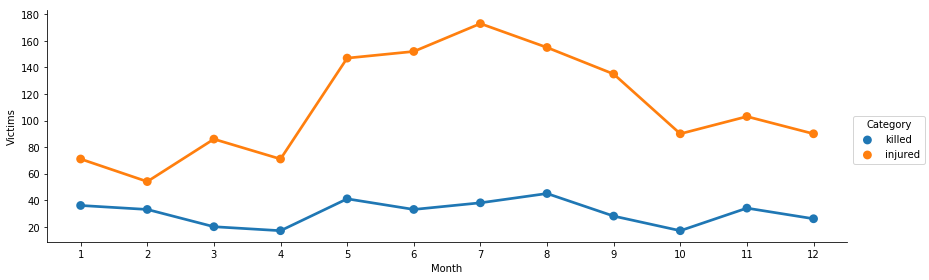

In [129]:
sns.factorplot(x = 'Month', y= 'Victims', data = shooting, hue = 'Category', aspect = 3)

#### Data Visualization Insight 2 : The argument stated above for this dataset is "On average, there is around one mass shooting for each day in America". The above data visualization gives an exaggerated view of the entire dataset. It is a deceptive version of the data because it shows a time trend of number of killings and number of injured people due to monthly mass shooting. Since this version is summed up monthly it gives an added effect about the consequences of mass shooting labeled on y-axis in terms of victims. Since I have aggregated the data monthly the number of victims data is aggregated which magnifies the impact of everyday mass shooting. It also gives a comparison between number of people injured vs number of people killed which was added in the original data visualization. The most interesting insight which I found that simple numbers if aggregated can give an exaggerated effect of the same dataset.

#### Future Enhancement: I want to use the total mass shooting information also in this chart but want to give a bifurcation of the result of the mass shooting in terms killed or injured. Location information can also be added as an additonal data point making this graph more comprehensible.

### Deceptive 3 : Support for gun ownership has sharply increased since the early 2000s
Dataset - http://www.people-press.org/2017/06/22/public-views-about-guns/#total 

Original Data Visualization

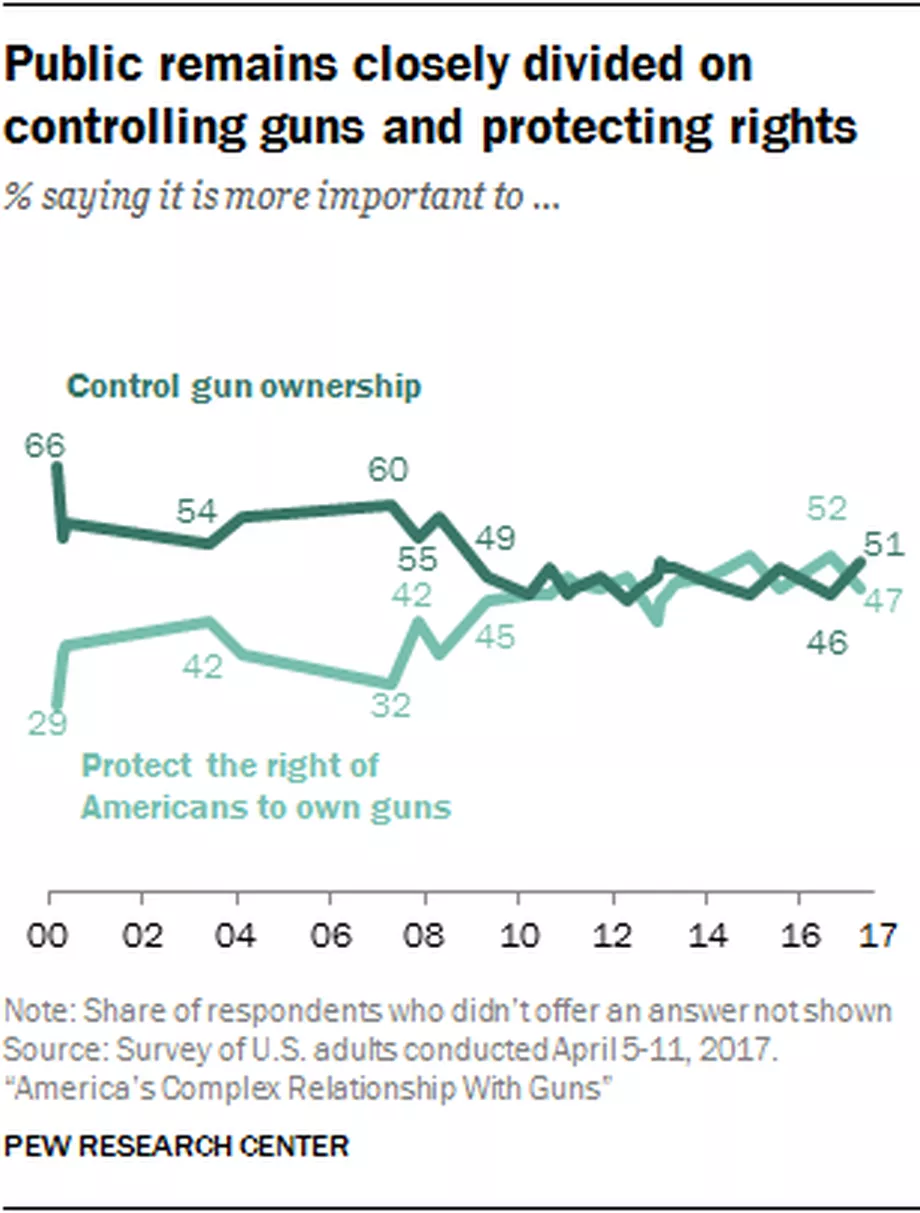

In [130]:
Image("gun_control_public_opinion.png", width = 200, height = 100)

Loading the Dataset

In [131]:
control = pd.read_excel("ControlRights.xlsx")

In [132]:
control.head()

,Date,Total rights,Total control
0,12/5/93,35,57
1,5/16/99,30,65
2,6/14/99,33,62
3,3/19/00,29,67
4,4/16/00,37,55


Extracting the Year column by first converting the Date to DateTime type

In [133]:
control['Date'] = pd.to_datetime(control['Date'])

In [134]:
control['Year']=control['Date'].apply(lambda x:int(x.year))

In [135]:
control.head()

,Date,Total rights,Total control,Year
0,1993-12-05,35,57,1993
1,1999-05-16,30,65,1999
2,1999-06-14,33,62,1999
3,2000-03-19,29,67,2000
4,2000-04-16,37,55,2000


Aggregating Data based on Year and find how many people supported gun rights and how many people were against gun ownership

In [136]:
cgrp = control.groupby('Year').agg({'Total rights':'sum','Total control':'sum'})

In [137]:
cgrp.head()

,Total rights,Total control
Year,,
1993,35,57
1999,63,127
2000,104,179
2003,42,54
2004,37,58


Reseting the index to Year for Data wrangling

In [138]:
cgrp.reset_index('Year', inplace = True)

In [139]:
cgrp.head()

,Year,Total rights,Total control
0,1993,35,57
1,1999,63,127
2,2000,104,179
3,2003,42,54
4,2004,37,58


Creating 2 datasets to have categorical data based on support and against of Gun Ownership rights

In [140]:
protect = cgrp[['Year','Total rights']]

In [141]:
protect['Category'] = 'Support Gun Onwership'

In [142]:
protect.rename(columns = {'Total rights':'People'}, inplace = True)

In [143]:
protect.head()

,Year,People,Category
0,1993,35,Support Gun Onwership
1,1999,63,Support Gun Onwership
2,2000,104,Support Gun Onwership
3,2003,42,Support Gun Onwership
4,2004,37,Support Gun Onwership


In [144]:
tight = cgrp[['Year','Total control']]

In [145]:
tight['Category'] = 'Against Gun Ownership'

In [146]:
tight.rename(columns = {'Total control':'People'}, inplace = True)

In [147]:
tight.head()

,Year,People,Category
0,1993,57,Against Gun Ownership
1,1999,127,Against Gun Ownership
2,2000,179,Against Gun Ownership
3,2003,54,Against Gun Ownership
4,2004,58,Against Gun Ownership


Appending the two datasets together for displaying the Data together

In [148]:
vote = protect.append(tight)

In [149]:
vote.head()

,Year,People,Category
0,1993,35,Support Gun Onwership
1,1999,63,Support Gun Onwership
2,2000,104,Support Gun Onwership
3,2003,42,Support Gun Onwership
4,2004,37,Support Gun Onwership


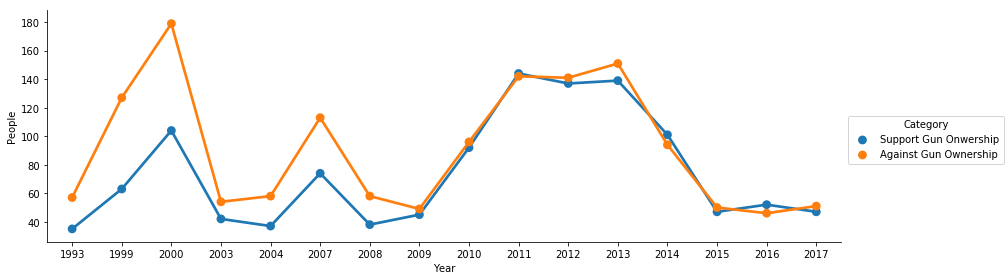

In [150]:
sns.factorplot(x = 'Year', y = 'People', data = vote, hue = 'Category' ,aspect = 3)

#### Data Visualization Insight 3: Original data had an argument that support for gun ownership has sharply increased since the early 2000s however the way I have wrangled the data gives a deceptive version of the dataset. I have used the data for all the years to show a time trend of how the people have either supported gun ownership or were against gun onwership. This is a deceptive version because instead of a focusing on bi-yearly data it shows the data for the all the number of years data which gives a slightly different picture of the facts. The above graph states that even if the gun ownership support has increased it has decreased in the following years showing a trend. The use of scale in the above deceptive verison presents the same data in a very different light stating that there are almost equal number of people against gun ownership and in support of gun onwership. The most interesting data insight is that the original data did not show the y-axis and had narrowed the years data limiting to only the data which supported the argument. However what the actual data presented when changed the axis and way it was aggregated was a revelation in itself.

#### Future Enhancement: I would probably delve deeper into the data for either support or against gun ownership data. Or may be merge it with a different dataset to find interesting pattern which can support or weaken our argument further.